In [426]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from datetime import date, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [427]:
# reading data 
data = pd.read_csv('./case_time_series.csv')

In [428]:
    data.tail()

Date    Date_YMD  Daily Confirmed  Total Confirmed  \
488  1 June 2021  2021-06-01           133152         28306818   
489  2 June 2021  2021-06-02           134044         28440862   
490  3 June 2021  2021-06-03           132424         28573286   
491  4 June 2021  2021-06-04           120454         28693740   
492  5 June 2021  2021-06-05           113898         28807638   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
488           231397         26170916            3205          334525  
489           211890         26382806            2898          337423  
490           206722         26589528            2717          340140  
491           197763         26787291            3372          343512  
492           187991         26975282            2669          346181

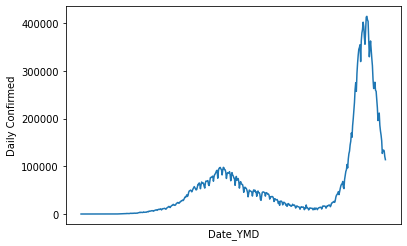

In [429]:
#taking only necessary data
sns.lineplot(x='Date_YMD', y='Daily Confirmed', data=data)
plt.xticks([])
plt.show()

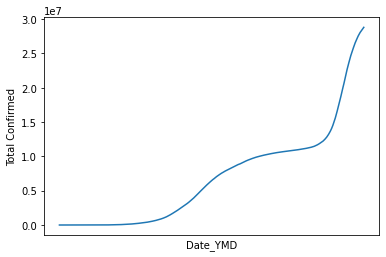

In [430]:
sns.lineplot(x='Date_YMD', y='Total Confirmed', data=data)
plt.xticks([])
plt.show()

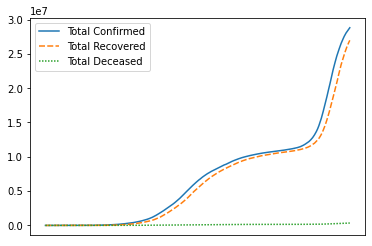

In [431]:
totalData = data.drop(columns=['Daily Confirmed', 'Daily Recovered', 'Daily Deceased'])
sns.lineplot(data=totalData)
plt.xticks([])
plt.show()

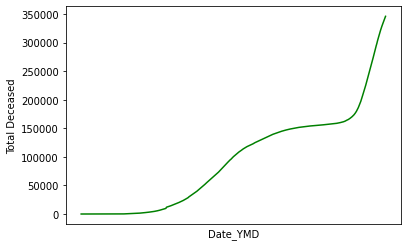

In [432]:
sns.lineplot(x='Date_YMD', y='Total Deceased', data=totalData, color='green')
plt.xticks([])
plt.show()

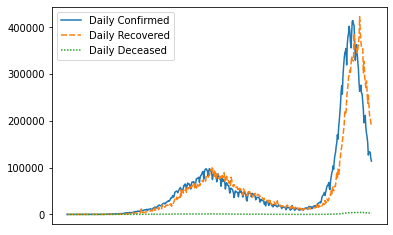

In [433]:
DailyData = data.drop(columns=['Total Confirmed', 'Total Recovered', 'Total Deceased'])
sns.lineplot(data=DailyData)
plt.xticks([])
plt.show()

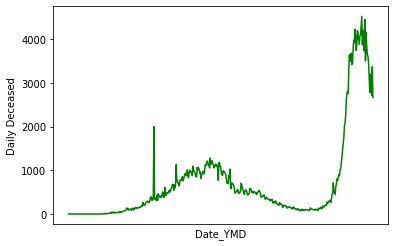

In [434]:
sns.lineplot(x='Date_YMD', y='Daily Deceased', data=DailyData, color='green')
plt.xticks([])
plt.show()

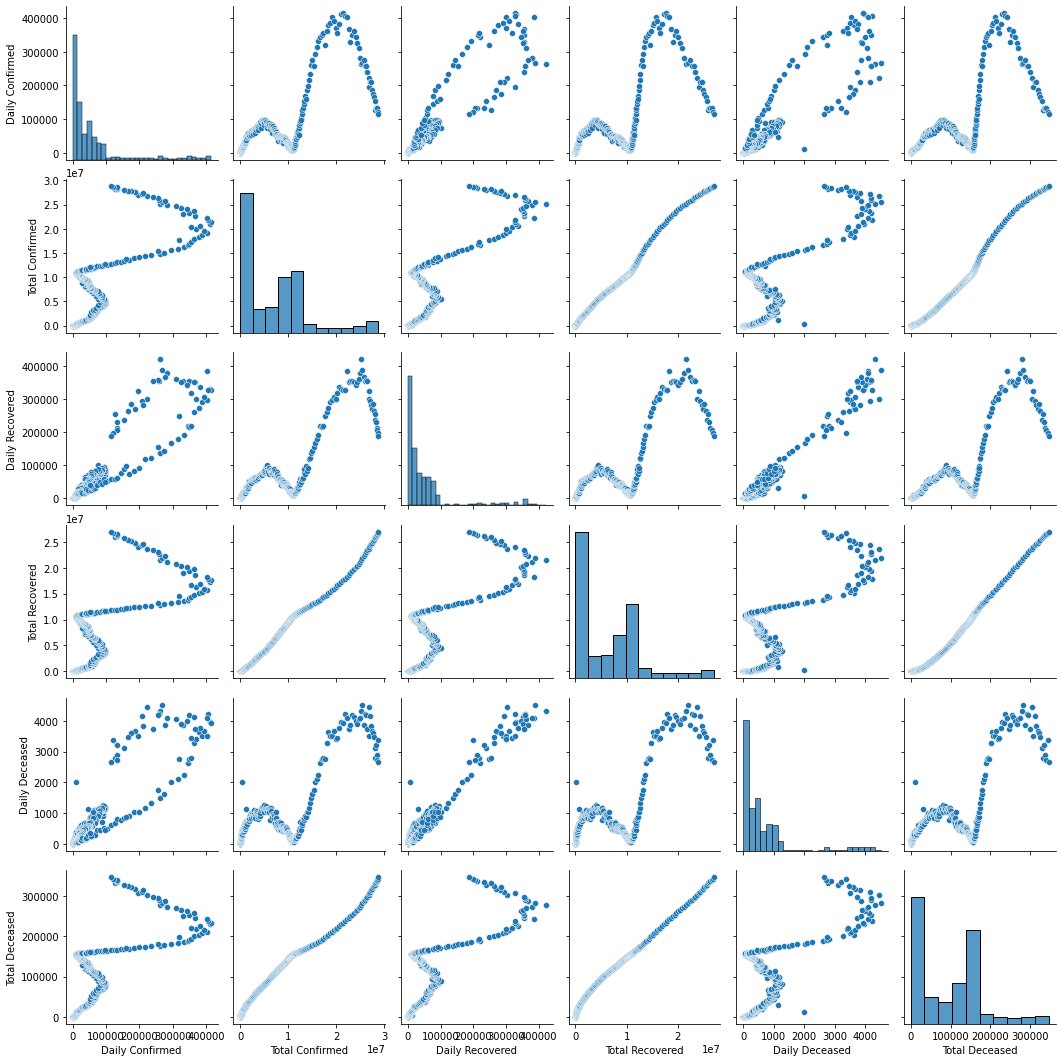

In [435]:
sns.pairplot(data=data)

## Training

In [436]:
# defining models
svr_rbf = SVR(kernel='rbf', epsilon=0.08)
RFRegressor = RandomForestRegressor(max_depth=3,n_estimators=3,random_state=0)

In [437]:
# converting date-string to date timestamp
data['Date_YMD'] = pd.to_datetime(data["Date_YMD"])
data['Date_YMD'] = data['Date_YMD'].map(dt.datetime.toordinal)

In [438]:
# Reading required data
X = data.iloc[:, 1].values
y = data.iloc[:, 3].values

In [439]:
X_train, X_test, y_train, y_test = train_test_split(data['Date_YMD'], y, test_size=0.2, random_state=0)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

## training models

In [440]:
# Scaling current values down
maxConfirmedCases = max(data['Total Confirmed'])
maxDate = max(data['Date_YMD'])

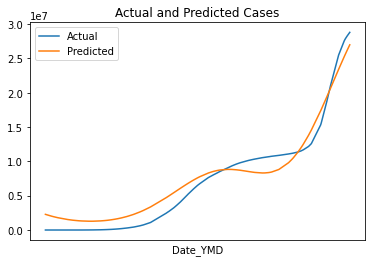

0.9490311380188391

In [441]:
# training model on normalized values
svr_rbf.fit(X_train/maxDate, y_train/maxConfirmedCases)
predicted_cases = svr_rbf.predict(X_test_reshaped/maxDate)
# plotting test cases vs predicted cases
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=predicted_cases*maxConfirmedCases)
plt.legend(['Actual', 'Predicted'])
plt.xticks([])
plt.title('Actual and Predicted Cases')
plt.show()
# calculating accuracy of model
svr_rbf.score(X_test_reshaped/maxDate, y_test/maxConfirmedCases)

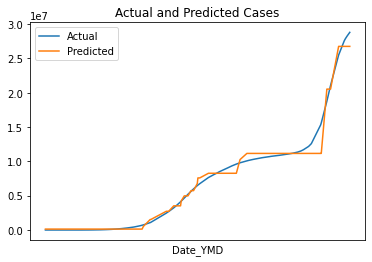

0.9861205507152978

In [442]:
# training model on normalized values
RFRegressor.fit(X_train/maxDate, y_train/maxConfirmedCases)
predicted_cases = RFRegressor.predict(X_test_reshaped/maxDate)
# plotting test cases vs predicted cases
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=predicted_cases*maxConfirmedCases)
plt.legend(['Actual', 'Predicted'])
plt.xticks([])
plt.title('Actual and Predicted Cases')
plt.show()
# calculating accuracy of model
RFRegressor.score(X_test_reshaped/maxDate, y_test/maxConfirmedCases)

### using Random Forest as its accuracy is more


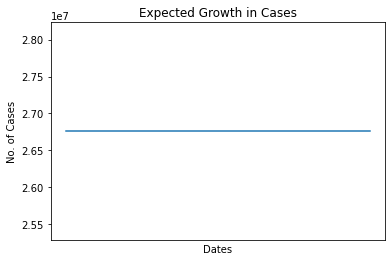

In [443]:
# Predicting the confirmed cases in India till 31st July

# creating array of required dates
start = pd.to_datetime('2021-06-06')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_cases = (RFRegressor.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))*maxConfirmedCases

# plotting predicted cases
sns.lineplot(x=datelist, y=predicted_cases)
plt.xlabel('Dates')
plt.ylabel('No. of Cases')
plt.title('Expected Growth in Cases')
plt.xticks([])
plt.show()

### model overtrained



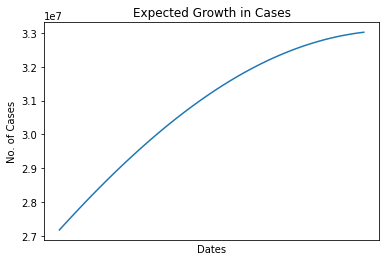

In [444]:
# Predicting the confirmed cases in India till 31st July

# creating array of required dates
start = pd.to_datetime('2021-06-06')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_cases = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))*maxConfirmedCases

# plotting predicted cases
sns.lineplot(x=datelist, y=predicted_cases)
plt.xlabel('Dates')
plt.ylabel('No. of Cases')
plt.title('Expected Growth in Cases')
plt.xticks([])
plt.show()

In [445]:
#number of cases on 31st July
start = pd.to_datetime('2021-07-30')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_cases = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))*maxConfirmedCases

print(int(predicted_cases))

33022224


## For deaths


In [446]:
y = data.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(data['Date_YMD'], y, test_size=0.2, random_state=0)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

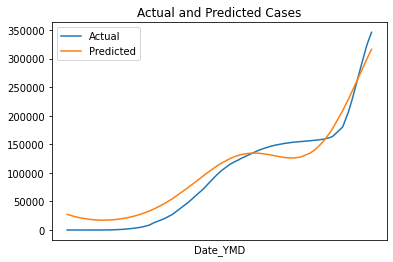

0.945704777816355

In [447]:
# Scaling current values down
maxDeaths = max(data['Total Deceased'])

# training model on normalized values
svr_rbf.fit(X_train/maxDate, y_train/maxDeaths)
predicted_deaths = svr_rbf.predict(X_test_reshaped/maxDate)
# plotting test cases vs predicted deaths
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=predicted_deaths*maxDeaths)
plt.legend(['Actual', 'Predicted'])
plt.xticks([])
plt.title('Actual and Predicted Cases')
plt.show()
# calculating accuracy of model
svr_rbf.score(X_test_reshaped/maxDate, y_test/maxDeaths)

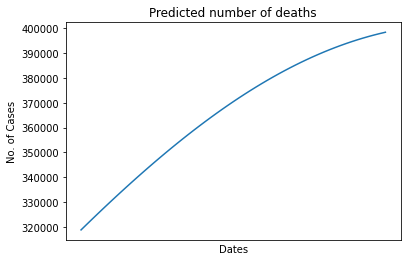

In [448]:
# Predicting the total deaths in India till 31st July

# creating array of required dates
start = pd.to_datetime('2021-06-06')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_deaths = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))*maxDeaths

# plotting predicted cases
sns.lineplot(x=datelist, y=predicted_deaths)
plt.xlabel('Dates')
plt.ylabel('No. of Cases')
plt.title('Predicted number of deaths')
plt.xticks([])
plt.show()

In [450]:
#number of deaths on 31st July
start = pd.to_datetime('2021-07-30')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_deaths = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))*maxDeaths

print(predicted_deaths)

[398441.57008162]


### predict recovery rate and death rate in India for the period 15th June to 31st of July 2021

In [451]:
recovery_rate = (data['Total Recovered'] / data['Total Confirmed'])*100
death_rate = (data['Total Deceased'] / data['Total Confirmed'])*100

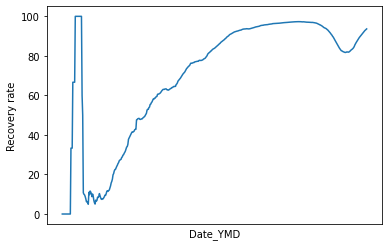

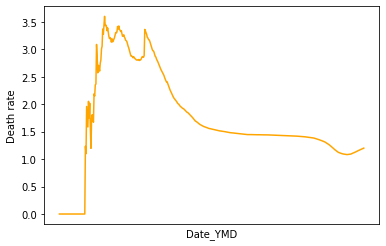

In [452]:
sns.lineplot(x=data['Date_YMD'], y=recovery_rate)
plt.xticks([])
plt.ylabel('Recovery rate')
plt.show()

sns.lineplot(x=data['Date_YMD'], y=death_rate, color = 'orange')
plt.xticks([])
plt.ylabel('Death rate')
plt.show()

### predicting recovery rate

In [453]:
    X_train, X_test, y_train, y_test = train_test_split(data['Date_YMD'], recovery_rate, test_size=0.2, random_state=0)
    X_train = X_train.to_numpy().reshape(-1, 1)
    X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

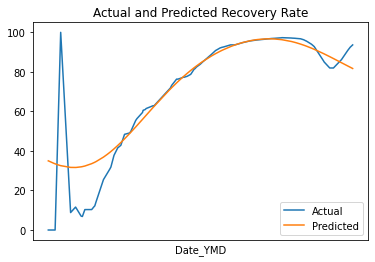

0.8476659066415996

In [454]:
# training model on normalized values
svr_rbf.fit(X_train/maxDate, y_train)
predicted_recovery_rate = svr_rbf.predict(X_test_reshaped/maxDate)
# plotting test cases vs predicted cases
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=predicted_recovery_rate)
plt.legend(['Actual', 'Predicted'])
plt.xticks([])
plt.title('Actual and Predicted Recovery Rate')
plt.show()
# calculating accuracy of model
svr_rbf.score(X_test_reshaped/maxDate, y_test)

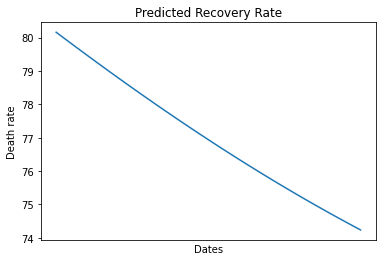

In [455]:
# Predicting the death rate in India from 15th June to 31st July

# creating array of required dates
start = pd.to_datetime('2021-06-15')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_recovery_rate = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))

# plotting predicted cases
sns.lineplot(x=datelist, y=predicted_recovery_rate)
plt.xlabel('Dates')
plt.ylabel('Death rate')
plt.title('Predicted Recovery Rate')
plt.xticks([])
plt.show()

### predicting death rate

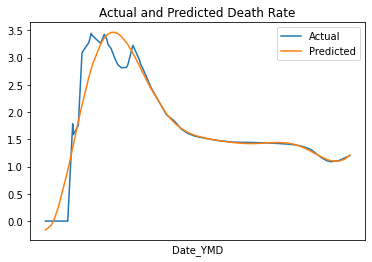

0.9267561298220315

In [464]:
X_train, X_test, y_train, y_test = train_test_split(data['Date_YMD'], death_rate, test_size=0.2, random_state=0)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

# training model on normalized values
svr_rbf.fit(X_train/maxDate, y_train)
predicted_death_rate = svr_rbf.predict(X_test_reshaped/maxDate)
# plotting test cases vs predicted cases
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=predicted_death_rate)
plt.legend(['Actual', 'Predicted'])
plt.xticks([])
plt.title('Actual and Predicted Death Rate')
plt.show()
# calculating accuracy of model
svr_rbf.score(X_test_reshaped/maxDate, y_test)

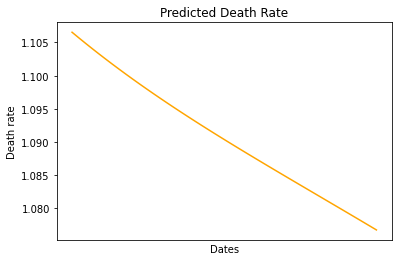

In [457]:
# Predicting the death rate in India from 15th June to 31st July

# creating array of required dates
start = pd.to_datetime('2021-06-15')
end = pd.to_datetime('2021-07-31')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_death_rate = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))

# plotting predicted cases
sns.lineplot(x=datelist, y=predicted_death_rate, color='orange')
plt.xlabel('Dates')
plt.ylabel('Death rate')
plt.title('Predicted Death Rate')
plt.xticks([])
plt.show()

# 5

In [458]:
active_cases = data['Total Confirmed'] - data['Total Recovered'] - data['Total Deceased']
maxActiveCases = max(active_cases)

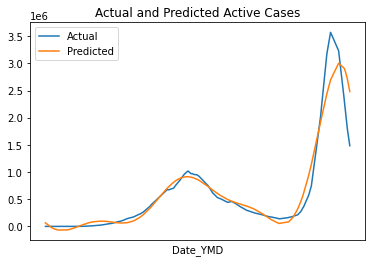

0.8944265350350016

In [459]:
svr_rbf = SVR(kernel='rbf', epsilon=0.02, C=100)

X_train, X_test, y_train, y_test = train_test_split(data['Date_YMD'], active_cases, test_size=0.2, random_state=0)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

# training model on normalized values
svr_rbf.fit(X_train/maxDate, y_train/maxActiveCases)
predicted_active_cases = svr_rbf.predict(X_test_reshaped/maxDate)
# plotting test cases vs predicted cases
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=predicted_active_cases*maxActiveCases)
plt.legend(['Actual', 'Predicted'])
plt.xticks([])
plt.title('Actual and Predicted Active Cases')
plt.show()
# calculating accuracy of model
svr_rbf.score(X_test_reshaped/maxDate, y_test/maxActiveCases)

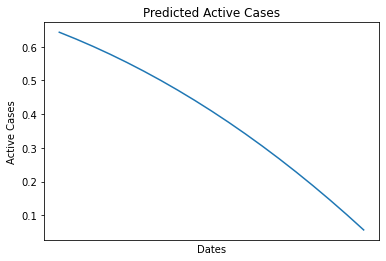

In [460]:
# Predicting the death rate in India from 15th June to 31st July

# creating array of required dates
start = pd.to_datetime('2021-06-6')
end = pd.to_datetime('2021-06-25')

datelist = pd.date_range(start, end - timedelta(days=1)).map(dt.datetime.toordinal)
predicted_active_cases = (svr_rbf.predict(datelist.to_numpy().reshape(-1, 1) / maxDate))

# plotting predicted cases
sns.lineplot(x=datelist, y=predicted_active_cases)
plt.xlabel('Dates')
plt.ylabel('Active Cases')
plt.title('Predicted Active Cases')
plt.xticks([])
plt.show()

In [461]:
start = 0
end = 0
flag = False
for i in range(0, len(predicted_active_cases)):
    if predicted_active_cases[i] < 0.2 and predicted_active_cases[i] > 0.1 and not flag:
        start = i
        flag = True
    if predicted_active_cases[i] < 0.1:
        end = i
        break

start = dt.datetime.fromordinal(datelist[start])
end = dt.datetime.fromordinal(datelist[end])
print(start)
print(end)

2021-06-21 00:00:00
2021-06-24 00:00:00


# 4


In [462]:
infection_rate = (int(predicted_cases)/1366400000)*100

In [463]:
infection_rate

2.416731850117096